# Evaluation

## Import Packages

In [1]:
import pickle
from tensorflow.keras.models import load_model
from tensorflow.math import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Load Model

In [2]:
model = load_model('../models/final_model.h5')

2022-05-13 17:19:44.871440: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-13 17:19:44.871899: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1


## Load test data

In [3]:
# Load test data
with open('../data/final/test.pickle', 'rb') as test:
    X_test, y_test = pickle.load(test)

## Accuracy

In [4]:
model.evaluate(X_test, y_test)

2022-05-13 17:19:53.041302: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-05-13 17:19:53.110294: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


20/20 [==============================] - 2s 59ms/step - loss: 0.6992 - accuracy: 0.8638


[0.6991806626319885, 0.8637820482254028]

In [5]:
preds = model.predict(X_test, 624).round()

2022-05-13 17:20:08.170546: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


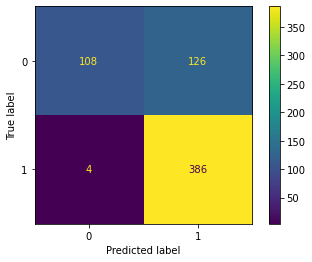

In [6]:
cm = confusion_matrix(y_test, preds)
ConfusionMatrixDisplay(cm).plot()